### Analysis of relationship between VBS and Ra - Part 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Plot results for up milling**

In [28]:
df_down= pd.read_excel('../data/input_new.xlsx',sheet_name ='down')
df_up=pd.read_excel('../data/input_new.xlsx',sheet_name='up')

In [29]:
df_down= df_down.dropna(axis=1)
df_up=df_up.dropna(axis=1)

In [30]:
speed = df_down['spindle_speed']
ap = df_down['ap']
fz = df_down['fz']
vbs = df_down['vbs']
Ra_down=df_down['Ra_down']
Ra_up=df_up['Ra_up']

In [54]:
out1 = df_down.loc[48, :]
out2 = df_down.loc[49, :]
out3 = df_down.loc[51, :]
out4 = df_down.loc[72, :]
out5 = df_down.loc[91, :]
df_out = pd.DataFrame([out1, out2, out3, out4, out5])
df_out

Nr.  spindle_speed   ap     fz  Ra_down     vbs
48  49.0        12000.0  0.6  0.050  6.11950  1200.0
49  50.0        12000.0  0.6  0.065  4.90925  1560.0
51  52.0        12000.0  0.6  0.100  4.04925  2400.0
72  73.0        14000.0  0.8  0.050  4.69225  1400.0
91  92.0        16000.0  0.6  0.100  5.91850  3200.0

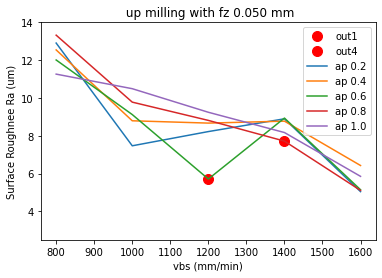

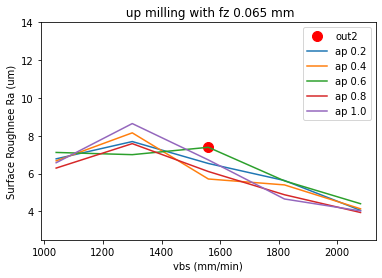

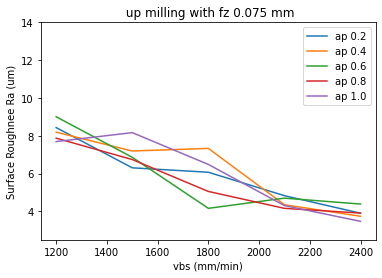

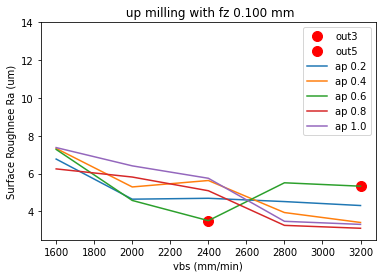

In [69]:
ap_set = np.sort(list(set(ap)))
fz_set = np.sort(list(set(fz)))

for fz_ele in fz_set:
    curve = []
    for ap_ele in ap_set:
        curve.append([vbs[(ap==ap_ele)&(fz==fz_ele)],Ra_up[(ap==ap_ele)&(fz==fz_ele)],ap_ele])
        if ap_ele == 0.6 and fz_ele == 0.05:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], Ra_up[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], 'ro', label='out1', markersize=10)
        if ap_ele == 0.6 and fz_ele == 0.065:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], Ra_up[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], 'ro', label='out2', markersize=10)
        if ap_ele == 0.6 and fz_ele == 0.1:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], Ra_up[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], 'ro', label='out3', markersize=10)
        if ap_ele == 0.8 and fz_ele == 0.05:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==14000)], Ra_up[(ap==ap_ele)&(fz==fz_ele)&(speed==14000)], 'ro', label='out4', markersize=10)
        if ap_ele == 0.6 and fz_ele == 0.1:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==16000)], Ra_up[(ap==ap_ele)&(fz==fz_ele)&(speed==16000)], 'ro', label='out5', markersize=10)
    for c in curve:
        plt.plot(c[0],c[1],label='ap '+str(c[2]))
    plt.legend(loc=1)
    plt.title(' up milling with fz %.3f mm'%fz_ele)
    plt.xlabel("vbs (mm/min)")
    plt.ylabel("Surface Roughnee Ra (um)")
    plt.ylim(2.5,14)
    #plt.savefig("fig/Up cutting parameters with fz {}.png".format(fz_ele))
    plt.show()

**Plot results for down milling**

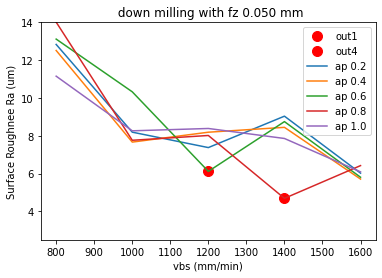

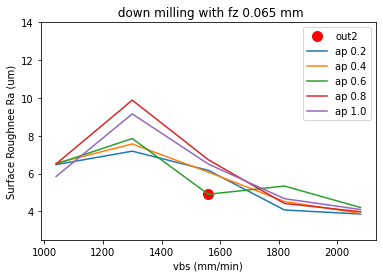

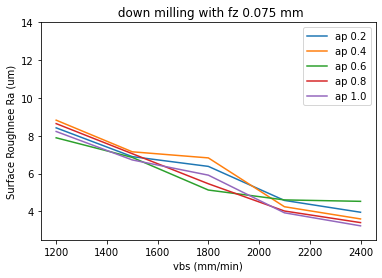

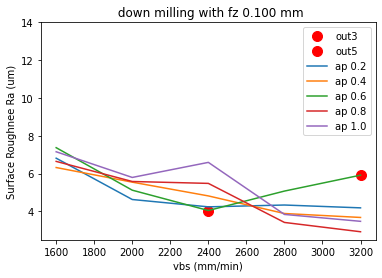

In [72]:
ap_set = np.sort(list(set(ap)))
fz_set = np.sort(list(set(fz)))

for fz_ele in fz_set:
    curve = []
    for ap_ele in ap_set:
        curve.append([vbs[(ap==ap_ele)&(fz==fz_ele)],Ra_down[(ap==ap_ele)&(fz==fz_ele)],ap_ele])
        if ap_ele == 0.6 and fz_ele == 0.05:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], Ra_down[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], 'ro', label='out1', markersize=10)
        if ap_ele == 0.6 and fz_ele == 0.065:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], Ra_down[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], 'ro', label='out2', markersize=10)
        if ap_ele == 0.6 and fz_ele == 0.1:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], Ra_down[(ap==ap_ele)&(fz==fz_ele)&(speed==12000)], 'ro', label='out3', markersize=10)
        if ap_ele == 0.8 and fz_ele == 0.05:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==14000)], Ra_down[(ap==ap_ele)&(fz==fz_ele)&(speed==14000)], 'ro', label='out4', markersize=10)
        if ap_ele == 0.6 and fz_ele == 0.1:
            plt.plot(vbs[(ap==ap_ele)&(fz==fz_ele)&(speed==16000)], Ra_down[(ap==ap_ele)&(fz==fz_ele)&(speed==16000)], 'ro', label='out5', markersize=10)
    for c in curve:
        plt.plot(c[0],c[1],label='ap '+str(c[2]))
    plt.legend(loc=1)
    plt.title(' down milling with fz %.3f mm'%fz_ele)
    plt.xlabel("vbs (mm/min)")
    plt.ylabel("Surface Roughnee Ra (um)")
    plt.ylim(2.5,14)
    #plt.savefig("fig/Down cutting parameters with fz {}.png".format(fz_ele))
    plt.show()

**Ra_down over VBS**

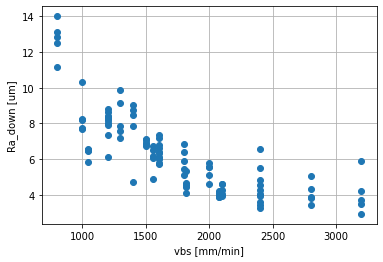

In [35]:
plt.plot(vbs, Ra_down, 'o')
plt.xlabel('vbs [mm/min]')
plt.ylabel('Ra_down [um]')
plt.grid()
plt.savefig("Ra-vbs.png")

In [10]:
ap_set = np.sort(list(set(ap)))
fz_set = np.sort(list(set(fz)))

In [19]:
ap_set

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [31]:
vbs0 = df_down.loc[df_down.ap == 0.2].vbs
Ra_down0 = df_down.loc[df_down.ap == 0.2].Ra_down
vbs1 = df_down.loc[df_down.ap == 0.4].vbs
Ra_down1 = df_down.loc[df_down.ap == 0.4].Ra_down
vbs2 = df_down.loc[df_down.ap == 0.6].vbs
Ra_down2 = df_down.loc[df_down.ap == 0.6].Ra_down
vbs3 = df_down.loc[df_down.ap == 0.8].vbs
Ra_down3 = df_down.loc[df_down.ap == 0.8].Ra_down
vbs4 = df_down.loc[df_down.ap == 1].vbs
Ra_down4 = df_down.loc[df_down.ap == 1].Ra_down

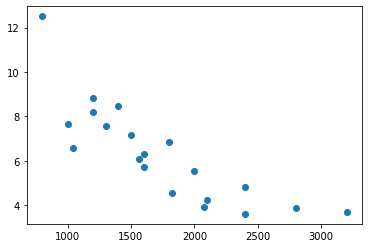

In [34]:
plt.plot(vbs1, Ra_down1, 'o')

In [16]:
df_down

Nr.  spindle_speed   ap     fz   Ra_down   vbs
0     1           8000  0.2  0.050  12.83250   800
1     2           8000  0.2  0.065   6.47625  1040
2     3           8000  0.2  0.075   8.42100  1200
3     4           8000  0.2  0.100   6.81600  1600
4     5           8000  0.4  0.050  12.51250   800
..  ...            ...  ...    ...       ...   ...
95   96          16000  0.8  0.100   2.92575  3200
96   97          16000  1.0  0.050   6.09400  1600
97   98          16000  1.0  0.065   4.09975  2080
98   99          16000  1.0  0.075   3.23825  2400
99  100          16000  1.0  0.100   3.47700  3200

[100 rows x 6 columns]